In [1]:
import torch

In [2]:
torch.__version__

'1.13.1.post200'

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


from torchvision import transforms
from torchvision.datasets import MNIST
import torchvision

In [4]:
# data

train_set = MNIST('./data', train=True, download=True,
        transform=transforms.Compose([transforms.ToTensor()]))
test_set = MNIST('./data', train=False, download=True,
        transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Model

class Model(nn.Module):
    def __init__(self):

        super(Model,self).__init__()

        # first layer
        self.conv1 = nn.Conv2d(1, 24, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(24)
        self.relu1 = nn.ReLU()

        # second layer
        self.conv2 = nn.Conv2d(24, 32, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()

        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):

        # shape of x is : 100 x 1 x 28 x 28
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = x.view(-1, 32 * 7 * 7)
        logits = self.fc(x)

        return logits

In [6]:
# Training scheme
model = Model()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(2):

    # train
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):

        logits = model(data)
        loss = F.cross_entropy(logits, target)

        # clear the old gradients if have
        optimizer.zero_grad()

        # backward propagation
        loss.backward()

        # update the parameters by using gradient descent algorithm
        optimizer.step()

        # print the results
        if batch_idx % 100 ==1:
            print('Epoch %02d | %d/%d | Loss: %.6f' % (epoch, batch_idx, len(train_loader), loss.item()))


    # evaluate the accuracy on the test
    model.eval()
    total = 0.0
    for batch_idx , (data, target) in enumerate(test_loader):

        logits = model(data)
        prob = F.softmax(logits, dim=1)
        pred = prob.data.argmax(dim=1)
        total += pred.eq(target.data).sum()

    accuracy = total / len(test_set)

    print('\Epoch %02d | Test accuracy %.6f\n' % (epoch, accuracy.item()))

Epoch 00 | 1/600 | Loss: 2.154606
Epoch 00 | 101/600 | Loss: 0.279108
Epoch 00 | 201/600 | Loss: 0.113408
Epoch 00 | 301/600 | Loss: 0.188511
Epoch 00 | 401/600 | Loss: 0.086836
Epoch 00 | 501/600 | Loss: 0.064984
\Epoch 00 | Test accuracy 0.981700

Epoch 01 | 1/600 | Loss: 0.040154
Epoch 01 | 101/600 | Loss: 0.046620
Epoch 01 | 201/600 | Loss: 0.093810
Epoch 01 | 301/600 | Loss: 0.083240
Epoch 01 | 401/600 | Loss: 0.023461
Epoch 01 | 501/600 | Loss: 0.077097
\Epoch 01 | Test accuracy 0.980100



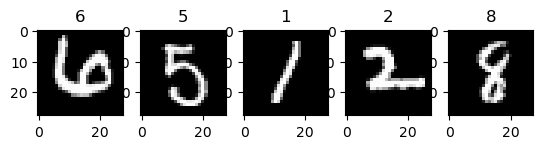

In [20]:
import matplotlib.pyplot as plt

img, val  = next(iter(test_loader))
logits = model(img)


prob = F.softmax(logits, dim=1)
pred = prob.data.argmax(dim=1)

fig,ax = plt.subplots(1,5)
for i in range(0,5):
    ax[i].imshow(img[i].detach().cpu().numpy()[0,:,:],cmap="gray")
    ax[i].set_title(pred[i].item())
plt.show()